In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("smoke_detection_iot.csv")

In [3]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [25]:
df['Temperature[C]'].median()

20.13

In [24]:
df['Humidity[%]'].median()

50.15

In [23]:
# 3rd one
df['TVOC[ppb]'].median()

981.0

In [22]:
# 4th one
df['eCO2[ppm]'].median()

400.0

In [21]:
# 5th one
df['Raw H2'].median()

12924.0

In [20]:
# 6th one
df['Raw Ethanol'].median()

19501.0

In [19]:
df['Pressure[hPa]'].median()

938.816

In [18]:
# 8th one
df['PM1.0'].median()

1.81

In [14]:
# 9th one
df['PM2.5'].median()

1.88

In [13]:
# 10th one
df['NC0.5'].median()

12.45

In [15]:
# 11th one
df["NC1.0"].median()

1.943

In [16]:
# 12th one
df['NC2.5'].median()

0.044

In [17]:
# 13th one
df['CNT'].median()

9336.0

In [17]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [18]:
df = df.drop(['Unnamed: 0', 'UTC', 'Raw Ethanol', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT'], axis=1)
#df = df.drop("UTC", axis=1)

In [19]:
X = df.drop("Fire Alarm", axis=1)
y = df['Fire Alarm']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [22]:
scaler = StandardScaler()

In [23]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lot_model = LogisticRegression()

In [26]:
lot_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [27]:
lot_model.coef_

array([[-0.21631614,  1.30200524, -0.25959065,  0.4665188 ,  0.18989119,
        -0.31409151]])

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
y_pred = lot_model.predict(scaled_X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.7620948427271276

In [31]:
confusion_matrix(y_test,y_pred)

array([[ 435, 1412],
       [  78, 4338]])

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

In [33]:
cm = confusion_matrix(y_test, y_pred)
#ConfusionMatrixDisplay()

In [34]:
ConfusionMatrixDisplay(cm)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.24      0.37      1847
           1       0.75      0.98      0.85      4416

    accuracy                           0.76      6263
   macro avg       0.80      0.61      0.61      6263
weighted avg       0.78      0.76      0.71      6263



In [36]:
sample = [[8.256,58.04,157,400,13207,20051,939.684,2.25,2.34,15.5,2.418,0.055,3268]]

In [37]:
lot_model.predict(sample)

ValueError: X has 13 features, but LogisticRegression is expecting 6 features as input.

In [38]:
X_train.iloc[200]

Temperature[C]       19.500
Humidity[%]          53.720
TVOC[ppb]           181.000
eCO2[ppm]           400.000
Raw H2            13157.000
Pressure[hPa]       939.637
Name: 31274, dtype: float64

In [26]:
y_test.iloc[100]

0

In [27]:
lot_model.predict(X_test.iloc[100].values.reshape(1, -1))

array([0])

In [28]:
X_train.iloc[100].values.reshape(1, -1)

array([[1.38600e+01, 5.12800e+01, 3.10000e+01, 4.00000e+02, 1.29970e+04,
        1.99060e+04, 9.39746e+02, 2.40000e-01, 2.50000e-01, 1.66000e+00,
        2.58000e-01, 6.00000e-03, 9.46000e+02]])

In [29]:
from joblib import dump, load

In [30]:
#dump(lot_model, 'smoke_detection.joblib') 

In [31]:
from sklearn.metrics import precision_recall_curve

In [32]:
precision_recall_curve(y_test, y_pred)

(array([0.70509341, 0.99456768, 1.        ]),
 array([1.        , 0.99501812, 0.        ]),
 array([0, 1]))

In [33]:
#sns.pairplot(df,hue='Fire Alarm')

In [36]:
limited = df[['Temperature[C]','Humidity[%]', 'Fire Alarm', 'Raw Ethanol']]
#sns.scatterplot(x='Temperature[C]',y='Humidity[%]',data=df,hue='Fire Alarm')

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=lot_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lot_model.classes_)

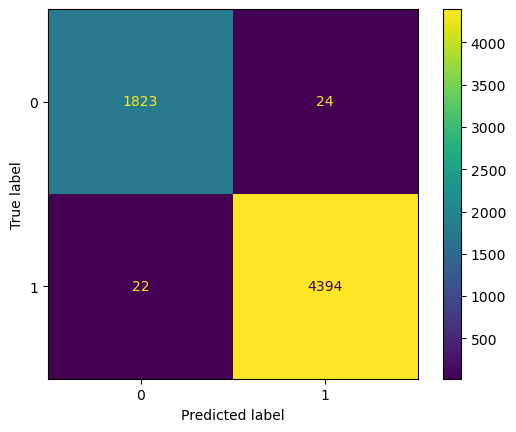

In [51]:
disp.plot()
plt.savefig('confusion_matrix.png')

In [46]:
from sklearn.metrics import RocCurveDisplay, roc_curve

/Users/shreyasb/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


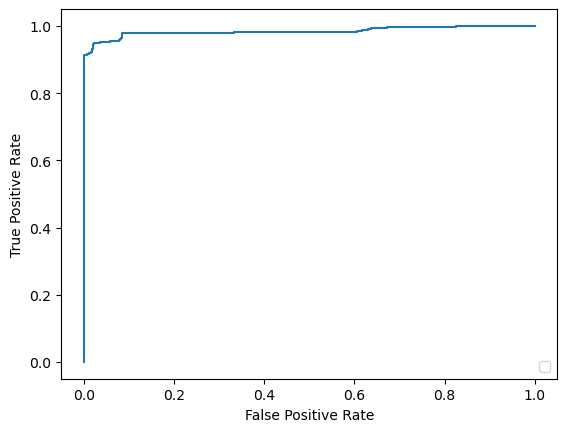

In [50]:
y_score = lot_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lot_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.savefig('true_false_positives.png')

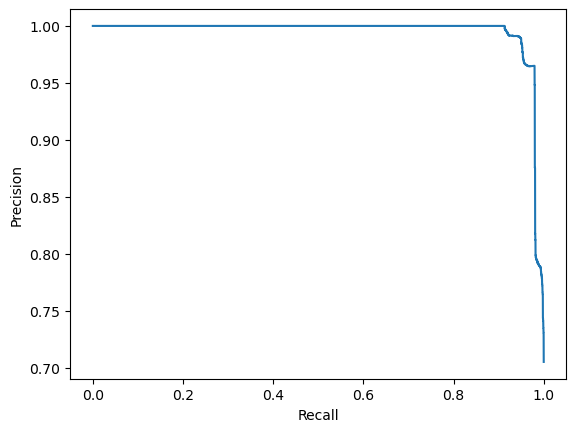

In [49]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=lot_model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.savefig('precision_recall.png')